In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

Function to plot ENMO, Angle Z, Light and non-wear_flag columns.

In [5]:
def plot_series_data(df, x_col='day_time', x_label='Day Relative to PCIAT + Time'):
    plt.figure(figsize=(18, 12))
    
    # ENMO
    plt.subplot(4, 1, 1)
    plt.scatter(df[x_col], df['enmo'], label='ENMO', color='green', s=1)
    plt.title('ENMO (Euclidean Norm Minus One)')
    plt.ylabel('Movement Intensity')

    # Angle Z
    plt.subplot(4, 1, 2)
    plt.scatter(df[x_col], df['anglez'], label='Angle Z', color='blue', s=1)
    plt.title('Angle Z')
    plt.ylabel('Angle (degrees)')

    # Light
    plt.subplot(4, 1, 3)
    plt.scatter(df[x_col], df['light'], label='Light', color='orange', s=1)
    plt.title('Ambient Light')
    plt.ylabel('Light (lux)')

    # Non-Wear Flag
    plt.subplot(4, 1, 4)
    plt.scatter(df[x_col], df['non-wear_flag'], label='Non-Wear Flag', color='red', s=1)
    plt.title('Non-Wear Flag')
    plt.ylabel('Worn (0 = Worn, 1 = Not Worn)')
    plt.xlabel(f'{x_label}')

    plt.tight_layout()
    plt.show()

# Single Participant Data Analysis:

In [8]:
train = pd.read_csv('/Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Dataset/child-mind-institute-problematic-internet-use/train.csv')

In [10]:
path = '/Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Dataset/child-mind-institute-problematic-internet-use/series_train.parquet/id=0417c91e/part-0.parquet'
series_train = pd.read_parquet(path)
series_train

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT
0,0,0.014375,-0.020112,-0.995358,0.001060,-88.445251,0.0,41.000000,4195.000000,44100000000000,2,2,5.0
1,1,0.014167,-0.023278,-0.996164,0.000289,-88.372200,0.0,41.000000,4194.833496,44105000000000,2,2,5.0
2,2,0.014036,-0.022964,-0.996320,0.000301,-88.356422,0.0,41.500000,4194.666504,44110000000000,2,2,5.0
3,3,0.013593,-0.022048,-0.996762,0.002278,-88.575943,0.0,37.500000,4194.500000,44115000000000,2,2,5.0
4,4,-0.061772,-0.065317,-0.973063,0.092321,-88.391273,0.0,55.666668,4199.000000,44780000000000,2,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287174,287174,-0.407433,0.091612,-0.377763,0.039733,-43.319416,0.0,7.000000,3695.000000,32875000000000,1,3,53.0
287175,287175,-0.703572,0.016187,0.159560,0.035980,14.121390,0.0,7.000000,3695.000000,32880000000000,1,3,53.0
287176,287176,-0.209607,-0.469700,0.636573,0.097799,44.998573,0.0,7.000000,3695.000000,32885000000000,1,3,53.0
287177,287177,-0.390378,0.284386,0.147654,0.057826,7.726313,0.0,7.000000,3695.000000,32890000000000,1,3,53.0


The description of the actigraphy data columns is as follows:

The parquet files are a series of files that need to be used as training data. 
The files are partitioned by id and each of them represent a series, which is a continuous recording of accelerometer data for a single participant across several days.

- id - This is the patient identifier.
  
- step - It is an integer timestep for each observation within a series. It corresponds to sequential data collection points.
  
- X, Y, Z - Theses are measures of acceleration, in g, experienced by the wrist-worn watch along each standard axis.
The three-dimensional accelerometer readings, describe the physical movement of the person wearing the device.

- enmo - ENMO is the Euclidean Norm Minus One of all accelerometer signals (along each of the x-, y-, and z-axis, measured in g-force) with negative values rounded to zero. Zero values are indicative of periods of no motion. It is a scalar value for the level of motion, where higher values indicate more activity, and zeros represent periods of no motion.
  
- anglez - Angle-Z is a metric derived from individual accelerometer components and refers to the angle of the arm relative to the horizontal plane. It provides information about the posture or how the arm is positioned during the activity.
  
- non-wear_flag - A flag (0: watch is being worn, 1: the watch is not worn) that helps in determining periods when the watch has been removed, based on the GGIR definition, which uses the standard deviation and range of the accelerometer data.
  
- light - Measure of ambient light in lux. It may help in distinguishing between different times of the day (day vs. night) or types of activities (e.g., being indoors or outdoors).
  
- battery_voltage - A measure of the battery voltage in mV.
  
- time_of_day - The dataset states that it is the time of day representing the start of a 5s window that the data has been sampled over, with format %H:%M:%S.%9f, but it is actually the time of the day measured in nanoseconds since midnight.
  
- weekday - The day of the week, coded as an integer with 1 being Monday and 7 being Sunday.This could provide insights into behavior patterns during diffferent days throughout the week and also comparison of data for weekdays versus weekends.
  
- quarter - The quarter of the year, an integer from 1 to 4. Could be relevant if there are seasonal patterns in activity (e.g., more outdoor activity in summer).
  
- relative_date_PCIAT - The number of days (integer) since the PCIAT test was administered (negative days indicate that the actigraphy data has been collected before the test was administered).

In [15]:
participant_id = path.split('/')[-2].split('=')[-1]
participant_id

'0417c91e'

In [20]:
train[train['id'] == participant_id]

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
68,0417c91e,Spring,6,1,Winter,40.0,Summer,15.484507,45.5,45.6,...,0.0,0.0,0.0,11.0,NaN,NaN,NaN,Summer,0.0,0.0


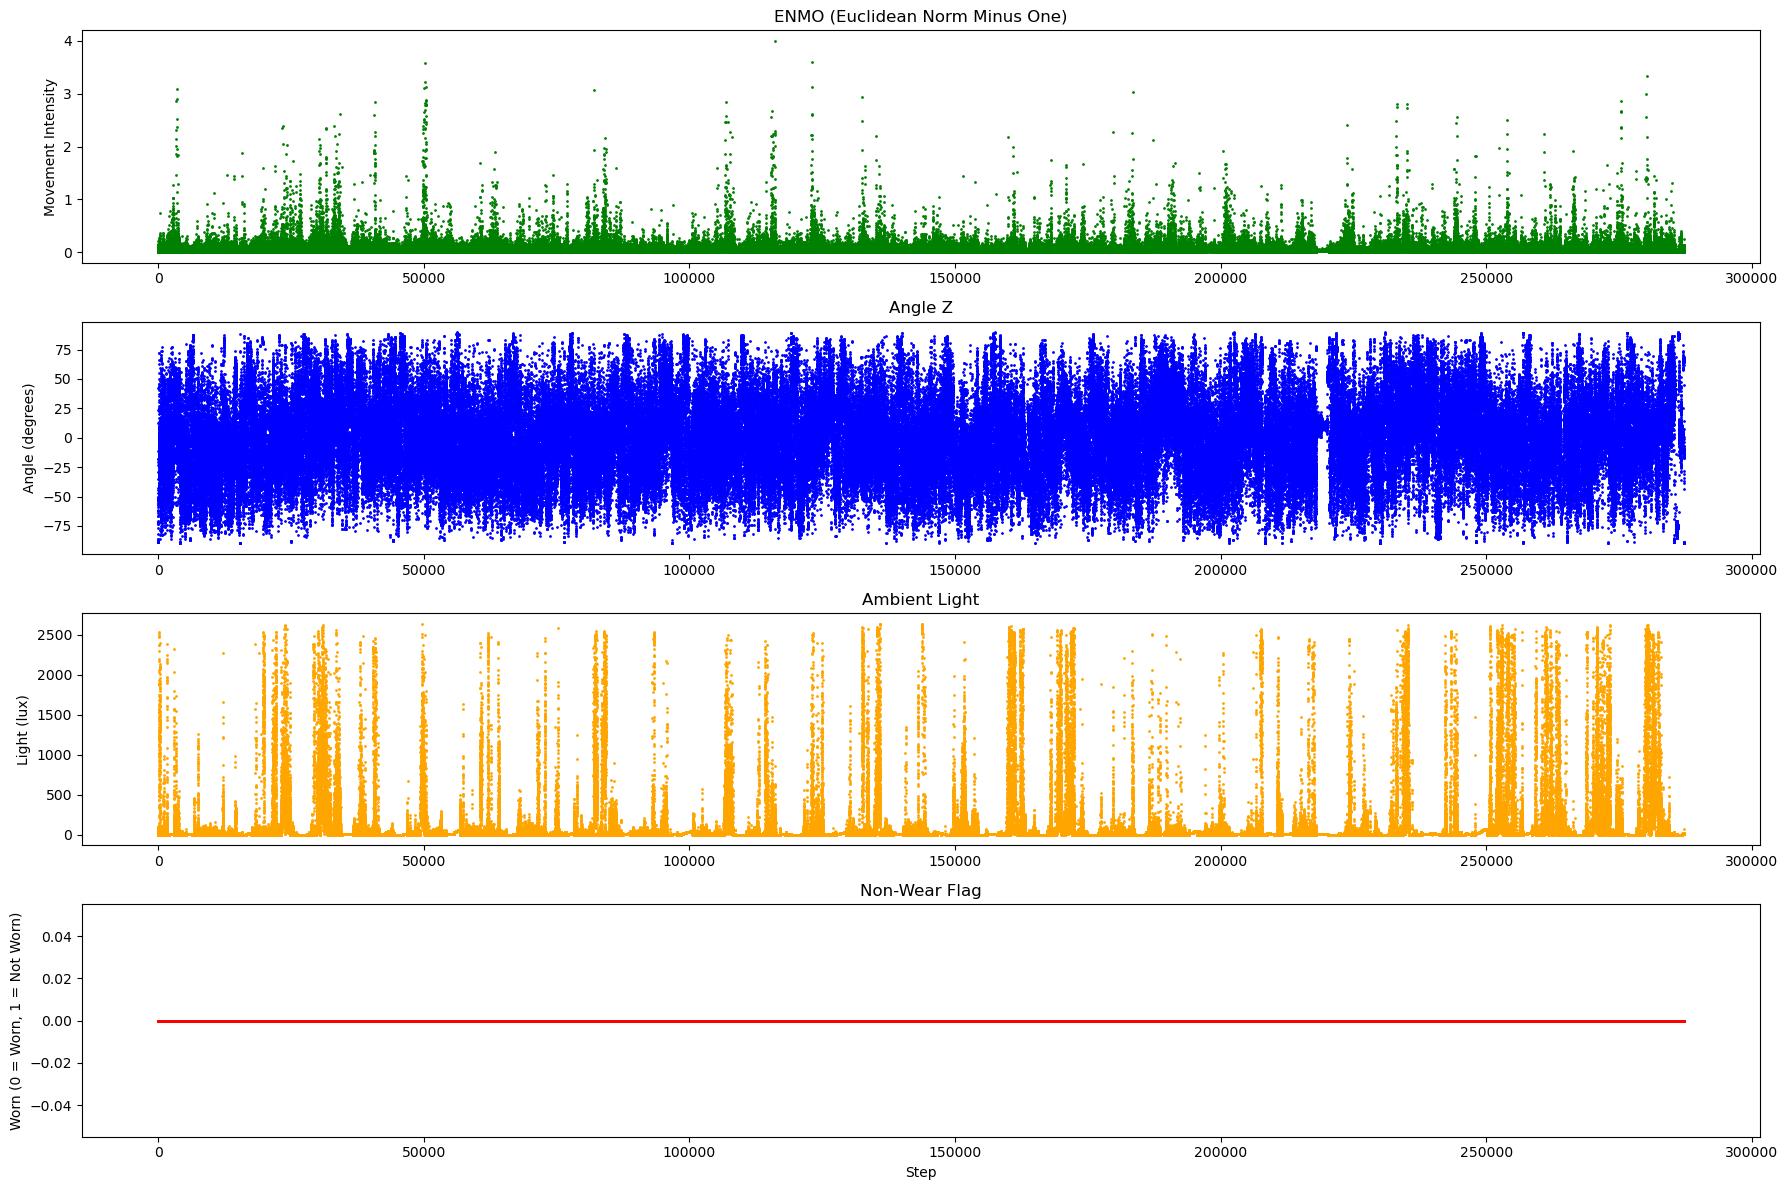

In [24]:
plot_series_data(series_train, x_col='step', x_label='Step')

When using the step column as the x-axis, the time points are assumed to be equidistant, meaning that each step represents a uniform interval (e.g., every 5 seconds). But in reality, there could be irregular time gaps between data points.

So, let us create a continuous time scale in days by transforming the time_of_day column (which is in nanoseconds) to hours and then combining it with relative_date_PCIAT.

In [27]:
series_train['time_of_day_hours'] = (
    series_train['time_of_day'] / 1e9 / 3600 # Converting nano seconds to hours
)
series_train['day_time'] = series_train['relative_date_PCIAT'] + (
    series_train['time_of_day_hours'] / 24 # Represents the day offest from the test date
)
series_train['day_time']

0          5.510417
1          5.510475
2          5.510532
3          5.510590
4          5.518287
            ...    
287174    53.380498
287175    53.380556
287176    53.380613
287177    53.380671
287178    53.380729
Name: day_time, Length: 287179, dtype: float64

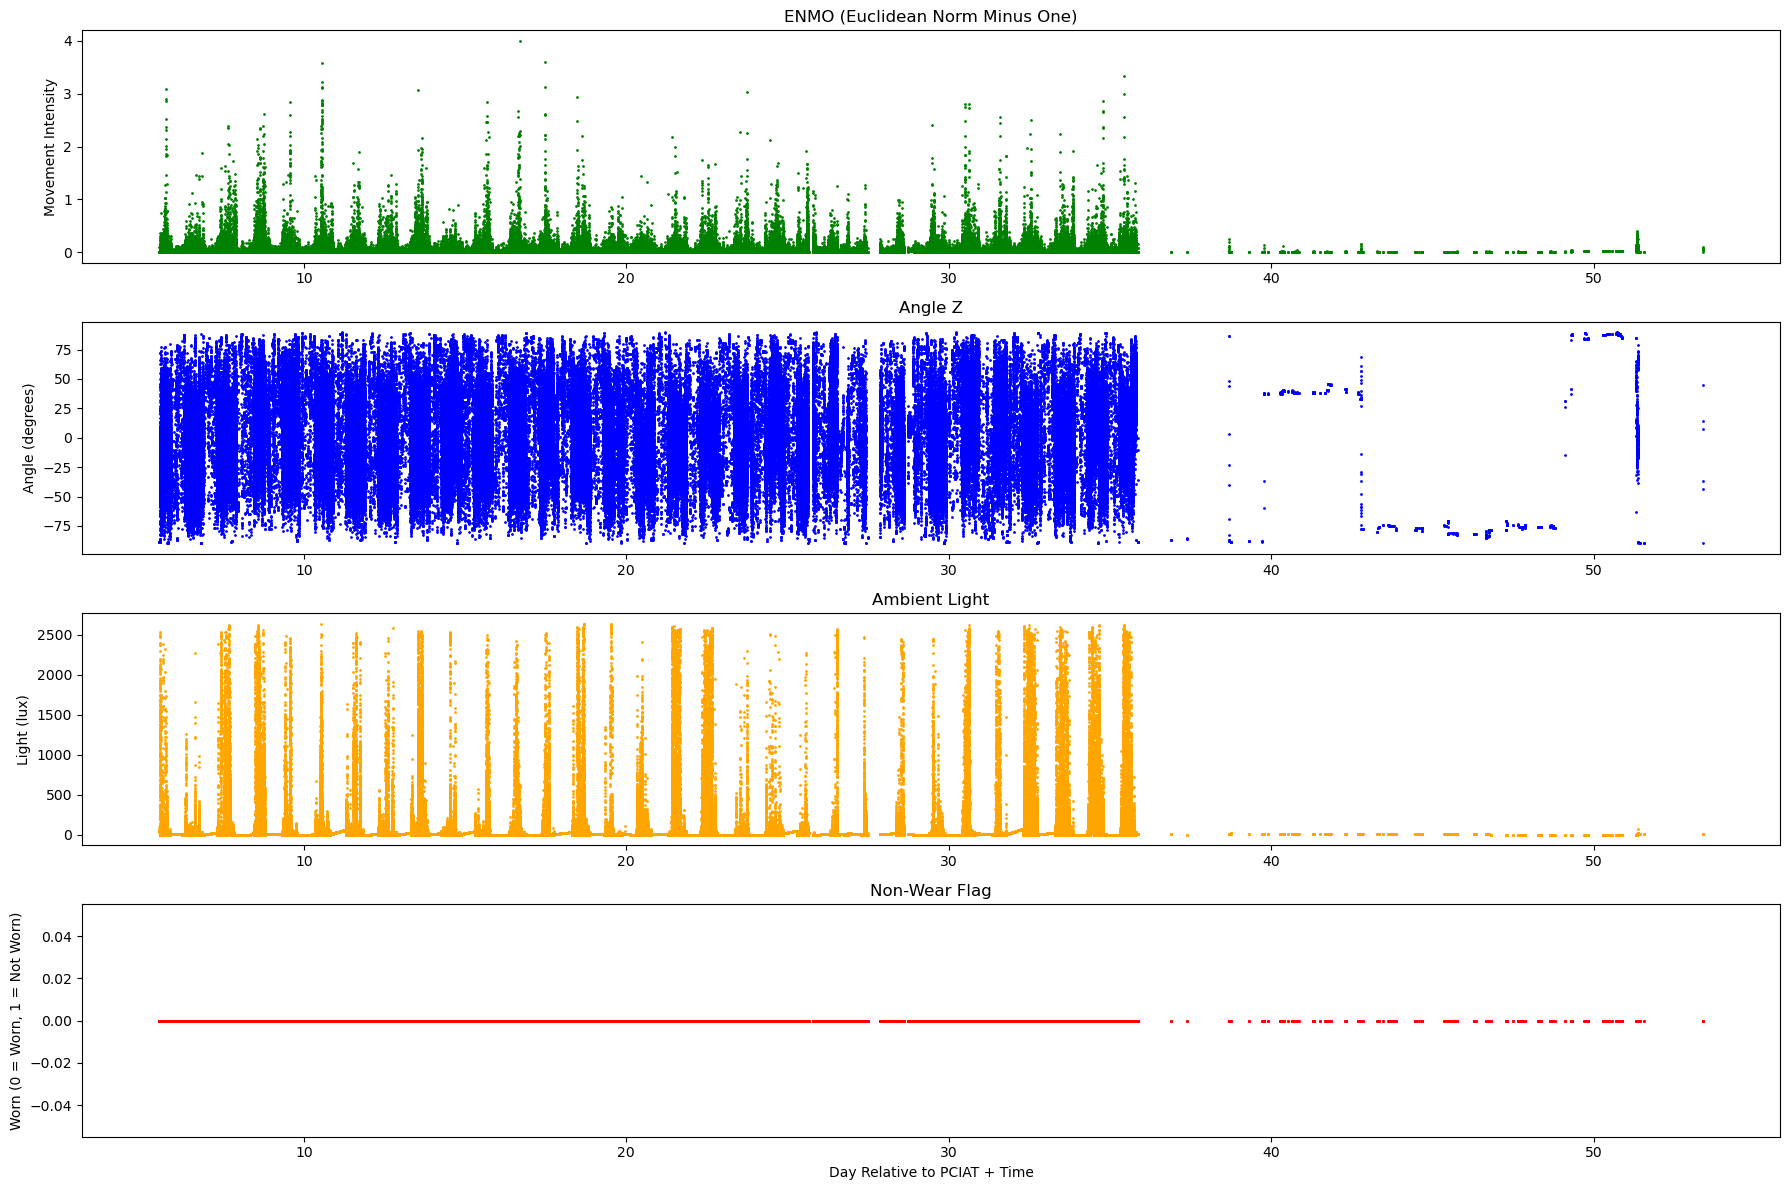

In [29]:
plot_series_data(series_train, x_col='day_time', x_label='Day Relative to PCIAT + Time')

Let us check if the data post Day 36 is not available because of any battery-related issue - like insufficient battery:

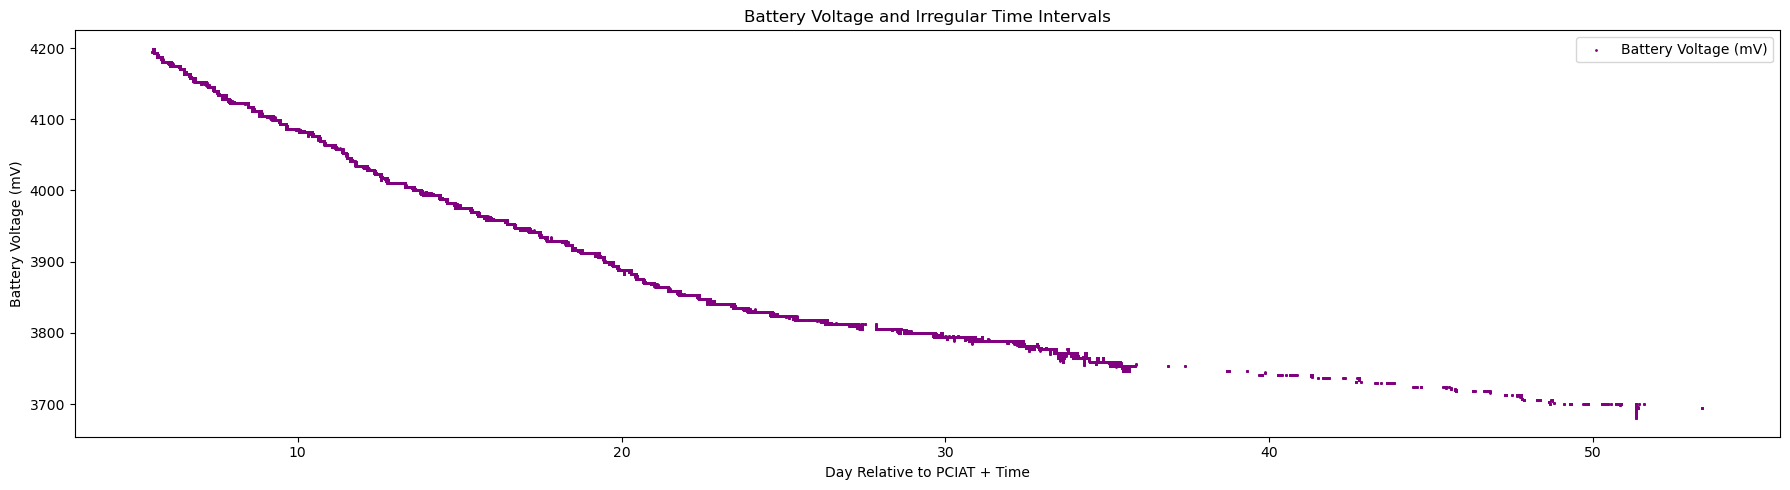

In [38]:
plt.figure(figsize=(18, 5))

plt.scatter(series_train['day_time'], series_train['battery_voltage'], 
            color='purple', label='Battery Voltage (mV)', s=1)

plt.xlabel('Day Relative to PCIAT + Time')
plt.ylabel('Battery Voltage (mV)')
plt.title('Battery Voltage and Irregular Time Intervals')
plt.legend()

plt.tight_layout()
plt.show()

Since, there is a lot of irregularity post day 36, let us look into it in more detail by observing the activity across day and night periods:

In [45]:
day_start_hour = 8 # Start of the day is considered to be 8am
day_end_hour = 21 # End of the day is consdered to be 9pm

series_train['day_period'] = np.where(
    (series_train['time_of_day_hours'] >= day_start_hour) &
    (series_train['time_of_day_hours'] < day_end_hour),
    'day', 'night'
)

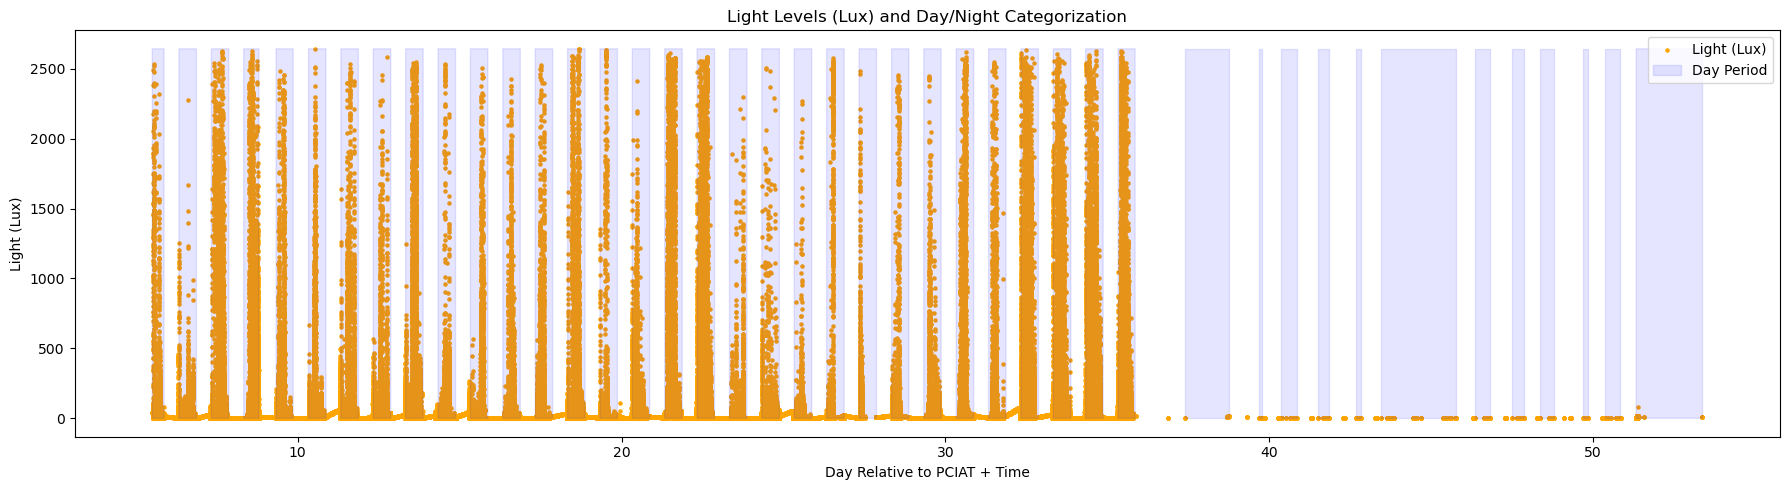

In [47]:
plt.figure(figsize=(18, 5))

plt.scatter(series_train['day_time'], series_train['light'], label='Light (Lux)', 
         color='orange', s=5)

plt.fill_between(series_train['day_time'],
                 0, series_train['light'].max(),
                 where=(series_train['day_period'] == 'day'),
                 color='blue', alpha=0.1, label='Day Period')

plt.title('Light Levels (Lux) and Day/Night Categorization')
plt.ylabel('Light (Lux)')
plt.xlabel('Day Relative to PCIAT + Time')
plt.legend()

plt.tight_layout()
plt.show()

In the above plot, we can see that the interval size (the default step size is 5 and appears to be consistent upto day 35 roughly) is irregular post day 36. So, let us check how the step size varies during this period.

In [56]:
expected_diff = 5

series_train['time_diff'] = (series_train['day_time'].diff() * 86400).round(0) # seconds in a day
series_train['measurement_after_gap'] = series_train['time_diff'] > expected_diff
series_train['measurement_after_gap'].value_counts()

measurement_after_gap
False    281762
True       5417
Name: count, dtype: int64

In [59]:
series_train['time_diff'].describe()

count    287178.000000
mean         14.402200
std         523.719089
min           5.000000
25%           5.000000
50%           5.000000
75%           5.000000
max      156445.000000
Name: time_diff, dtype: float64

In [61]:
156445 / 60 / 60 # seconds to hours

43.45694444444444

Now, let's Plot the data for specific day(s):

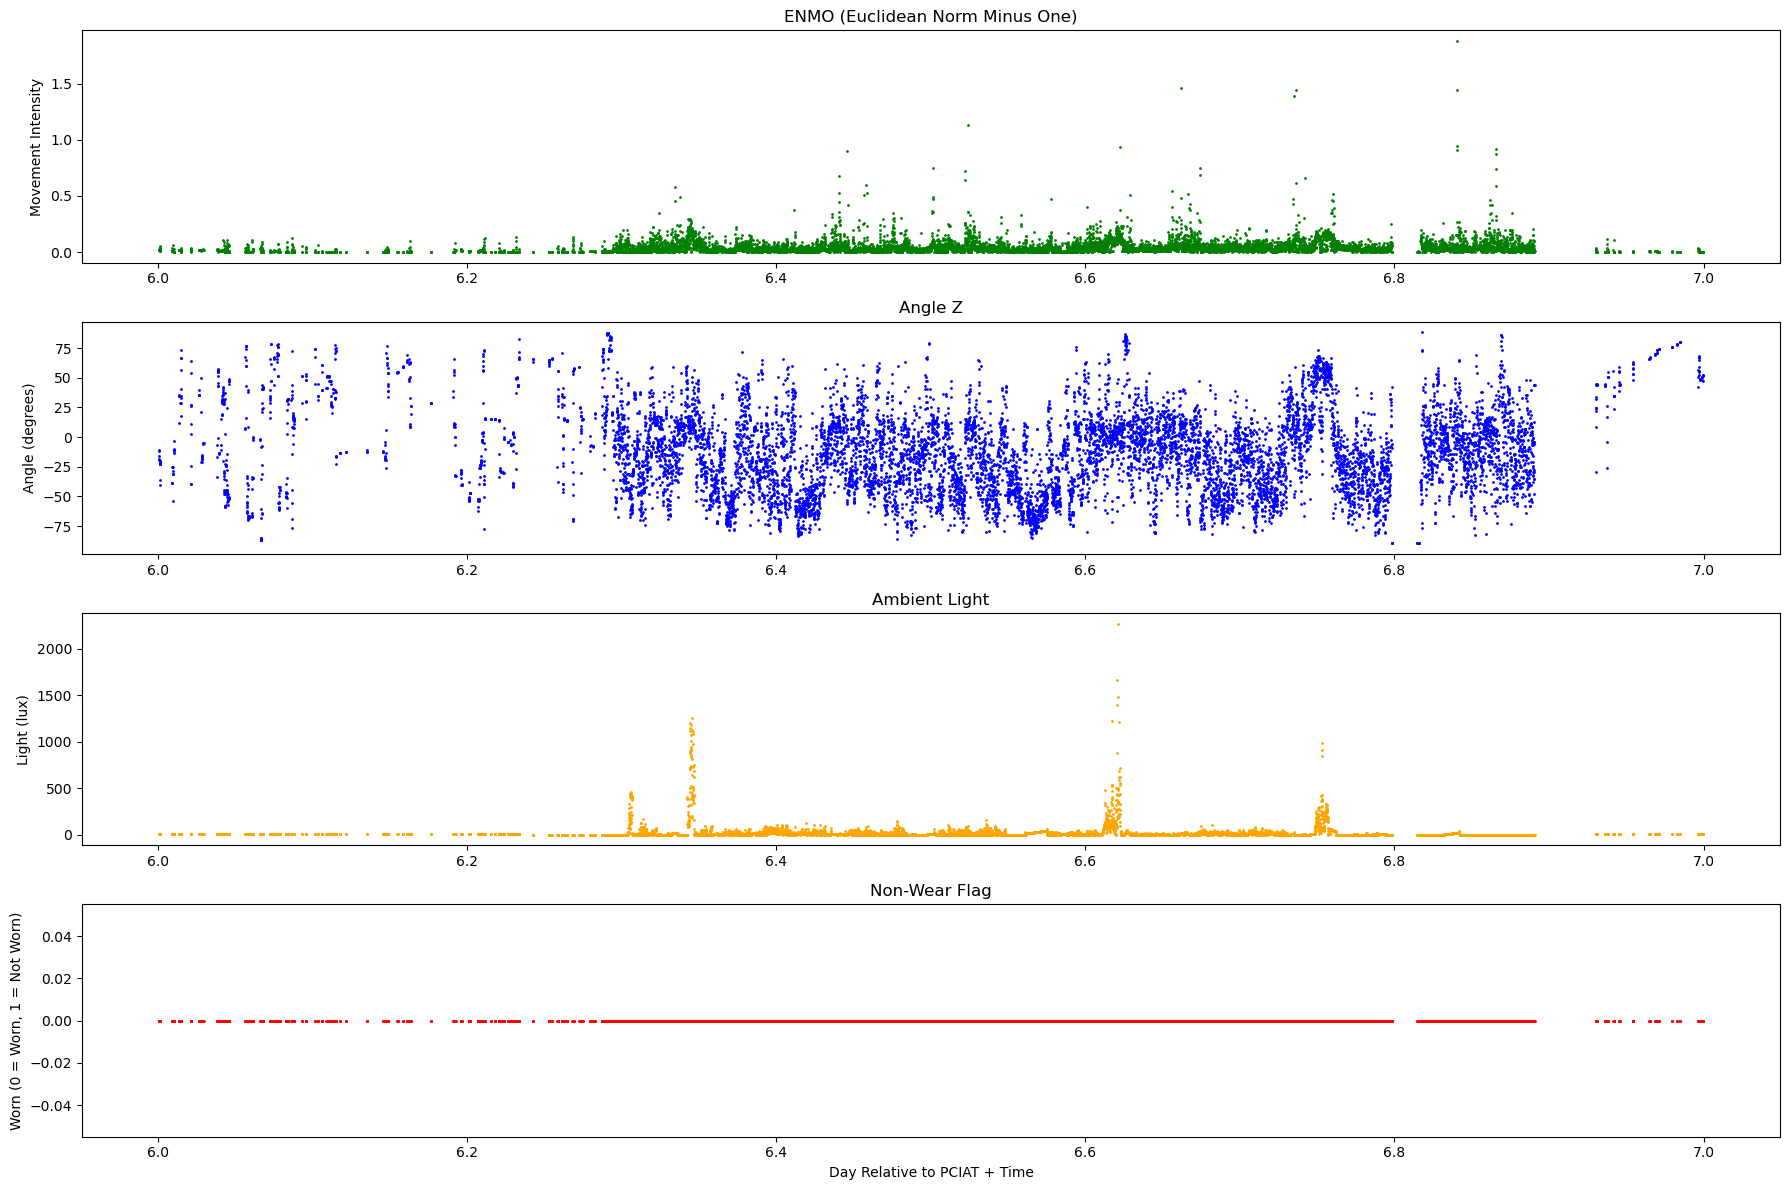

In [50]:
start_day = 2 # second day of wearing the device
show_days = 1 # the number of days for which we want to observe the data

first_day = min(series_train['relative_date_PCIAT']) + start_day - 1
filtered_data = series_train[
    (series_train['relative_date_PCIAT'] >= first_day) &
    (series_train['relative_date_PCIAT'] <= first_day + show_days - 1)
].copy()

plot_series_data(filtered_data)

Now, let's plot the data for specific hours:

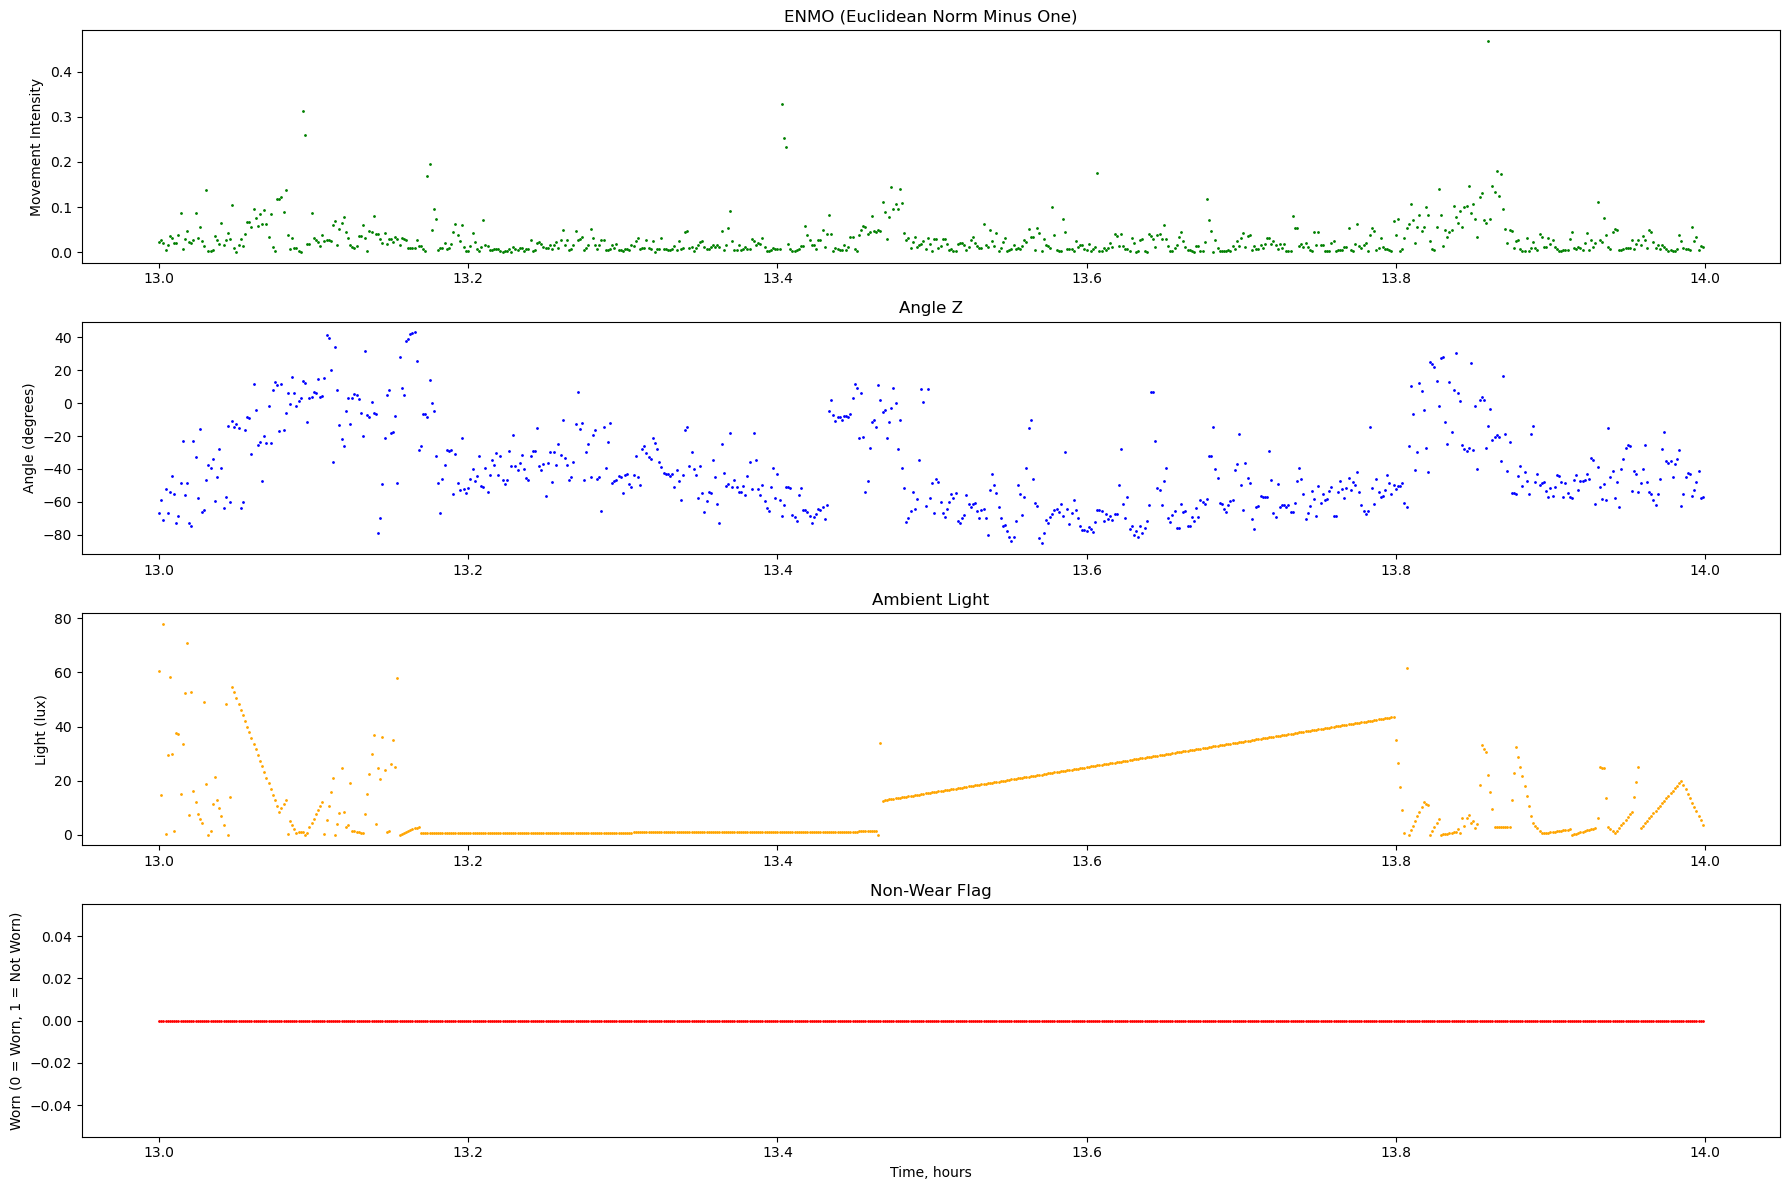

In [53]:
show_day = 2 # show second day
hour_from = 13 # starting from 1 pm
hour_to = 14 # to 2 pm

show_day = min(series_train['relative_date_PCIAT']) + show_day - 1
filtered_data = series_train[
    (series_train['relative_date_PCIAT'] == show_day) &
    (series_train['time_of_day_hours'] >= hour_from) & 
    (series_train['time_of_day_hours'] < hour_to)
].copy()

plot_series_data(filtered_data, x_col='time_of_day_hours', x_label='Time, hours')

# Analysis across all the Participants:

In [72]:
DIR = '/Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Dataset/child-mind-institute-problematic-internet-use/series_train.parquet'

def process_file(file_path, participant_id):
    data = pd.read_parquet(file_path)
    non_wear_percentage = (data['non-wear_flag'].sum() / len(data)) * 100
    worn_data = data[data['non-wear_flag'] == 0]

    return {
        'id': participant_id,
        'non_wear_percentage': non_wear_percentage,
        'enmo_stats': worn_data['enmo'].describe(),
        'anglez_stats': worn_data['anglez'].describe(),
        'light_stats': worn_data['light'].describe(),
        'battery_voltage_stats': worn_data['battery_voltage'].describe(),
        'unique_days': worn_data['relative_date_PCIAT'].nunique()
    }

results = []
for participant_id in os.listdir(DIR):
    participant_path = os.path.join(DIR, participant_id)
    if os.path.isdir(participant_path):
        file_path = os.path.join(participant_path, 'part-0.parquet')
        result = process_file(file_path, participant_id)
        results.append(result)

final_results = []
for result in results:
    flat_row = {
        'id': result['id'].replace('id=', ''),
        'non_wear_percentage': result['non_wear_percentage'],
        'unique_days': result['unique_days']
    }
    
    for key, stats in result.items():
        if isinstance(stats, pd.Series):
            for stat_name, stat_value in stats.items():
                flat_row[f'{key.replace("_stats", "")}_{stat_name}'] = stat_value
    
    final_results.append(flat_row)
    
stats_df = pd.DataFrame(final_results)
stats_df

,id,non_wear_percentage,unique_days,enmo_count,enmo_mean,enmo_std,enmo_min,enmo_25%,enmo_50%,enmo_75%,...,light_75%,light_max,battery_voltage_count,battery_voltage_mean,battery_voltage_std,battery_voltage_min,battery_voltage_25%,battery_voltage_50%,battery_voltage_75%,battery_voltage_max
0,0d01bbf2,0.000000,36,269335.0,0.061542,0.129371,0.0,0.007793,0.027122,0.068639,...,21.666666,2659.666748,269335.0,3876.515869,121.012596,3706.000000,3779.25,3841.0,3970.000000,4179.0
1,cefdb7fe,21.652455,25,319114.0,0.028185,0.058462,0.0,0.000329,0.007977,0.030215,...,22.000000,2648.000000,319114.0,3879.653076,156.151443,3098.166748,3774.00,3865.0,3994.000000,4181.0
2,58391429,61.118268,23,141608.0,0.005483,0.044352,0.0,0.000000,0.000000,0.000609,...,8.346325,1069.750000,141608.0,3843.673584,129.729309,3384.000000,3789.25,3835.0,3946.687561,4152.0
3,2ca2206f,0.000000,37,311959.0,0.045412,0.095587,0.0,0.005877,0.022030,0.041659,...,29.298994,2648.500000,311959.0,3874.709473,133.961487,3683.000000,3771.00,3829.0,3971.250000,4181.0
4,19455336,65.765192,21,122497.0,0.043142,0.129282,0.0,0.002312,0.011714,0.025168,...,9.557269,2408.199951,122497.0,3900.913330,199.253403,3098.166748,3826.75,3970.0,4017.000000,4133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,43a7386d,76.348729,23,88053.0,0.036777,0.160807,0.0,0.000034,0.002059,0.015907,...,10.114769,2216.800049,88053.0,3833.395996,161.431870,3442.000000,3782.00,3800.0,3859.000000,4192.0
992,2840643b,0.000000,26,72533.0,0.070964,0.129670,0.0,0.010700,0.028815,0.073403,...,24.666666,2255.500000,72533.0,4024.496338,94.724304,3830.000000,3935.00,4011.0,4111.000000,4171.0
993,1b329556,0.358241,24,400166.0,0.044584,0.117699,0.0,0.002354,0.009915,0.035297,...,17.563509,2561.399902,400166.0,3851.494141,163.691162,3098.166748,3747.00,3818.0,3970.000000,4184.0
994,62b873a2,30.744874,23,274116.0,0.054646,0.174712,0.0,0.000615,0.013286,0.038179,...,16.373960,2623.000000,274116.0,3895.863525,153.104218,3218.000000,3788.00,3853.0,4017.000000,4187.0


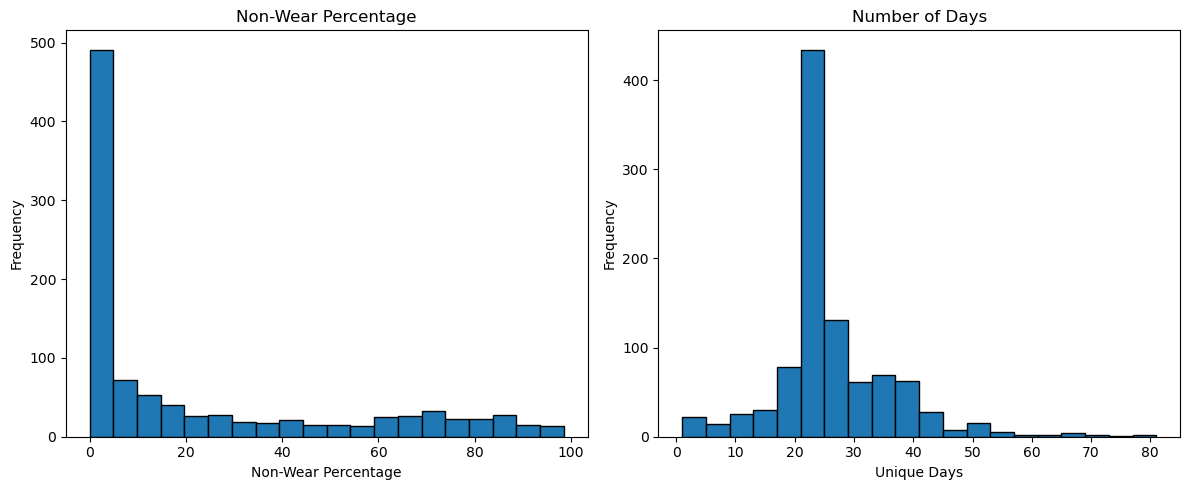

In [74]:
# non_wear_percentage
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(stats_df['non_wear_percentage'], bins=20, edgecolor='black')
plt.title('Non-Wear Percentage')
plt.xlabel('Non-Wear Percentage')
plt.ylabel('Frequency')

# unique_days
plt.subplot(1, 2, 2)
plt.hist(stats_df['unique_days'], bins=20, edgecolor='black')
plt.title('Number of Days')
plt.xlabel('Unique Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [76]:
stats_df[['non_wear_percentage', 'unique_days']].describe()

,non_wear_percentage,unique_days
count,996.000000,996.000000
mean,22.199020,25.892570
std,29.751492,9.950506
min,0.000000,1.000000
25%,0.000000,22.000000
50%,5.145835,24.000000
75%,39.636219,29.000000
max,98.515526,81.000000


Now, let's create simple plots to get a general overview of the variability in min, max, median, and std across the parameters (enmo, anglez, light, and battery_voltage).

In [79]:
def plot_parameter_statistics(stats_df, parameter):
    stats_to_plot = ['min', 'max', '50%', 'std']
    stat_labels = ['Min', 'Max', 'Median', 'Std']

    plt.figure(figsize=(14, 5))

    for j, stat in enumerate(stats_to_plot):
        plt.subplot(1, 4, j + 1)
        
        data = stats_df[f'{parameter}_{stat}']
        plt.hist(data, bins=20, alpha=0.7, edgecolor='black')
        
        plt.title(f'{parameter.capitalize()} - {stat_labels[j]}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

enmo

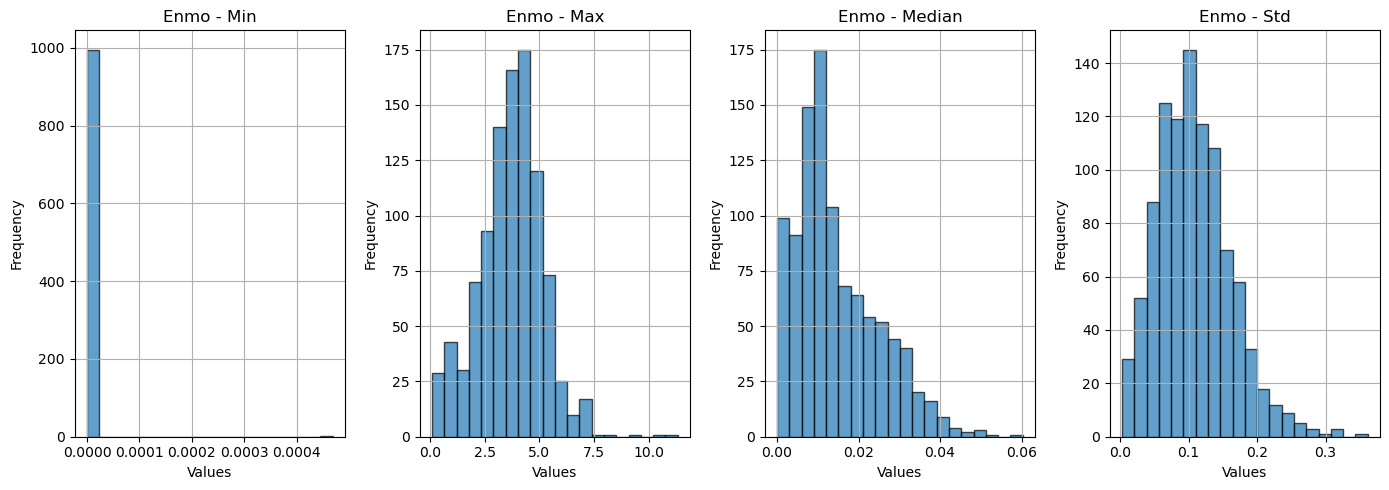

In [82]:
plot_parameter_statistics(stats_df, 'enmo')

angleZ

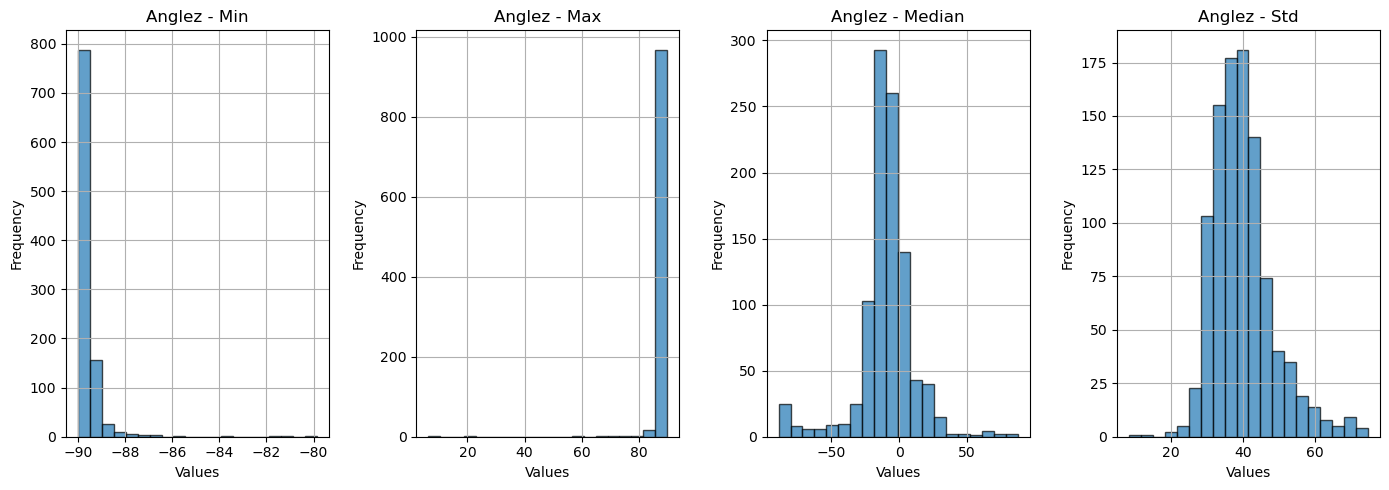

In [86]:
plot_parameter_statistics(stats_df, 'anglez')

light

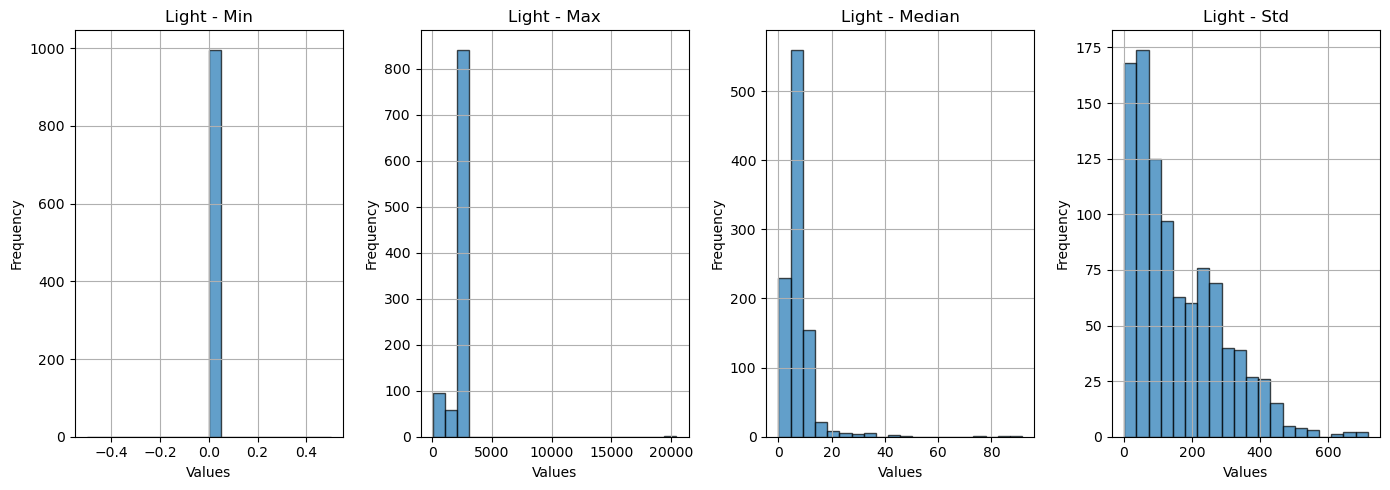

In [89]:
plot_parameter_statistics(stats_df, 'light')

battery_voltage

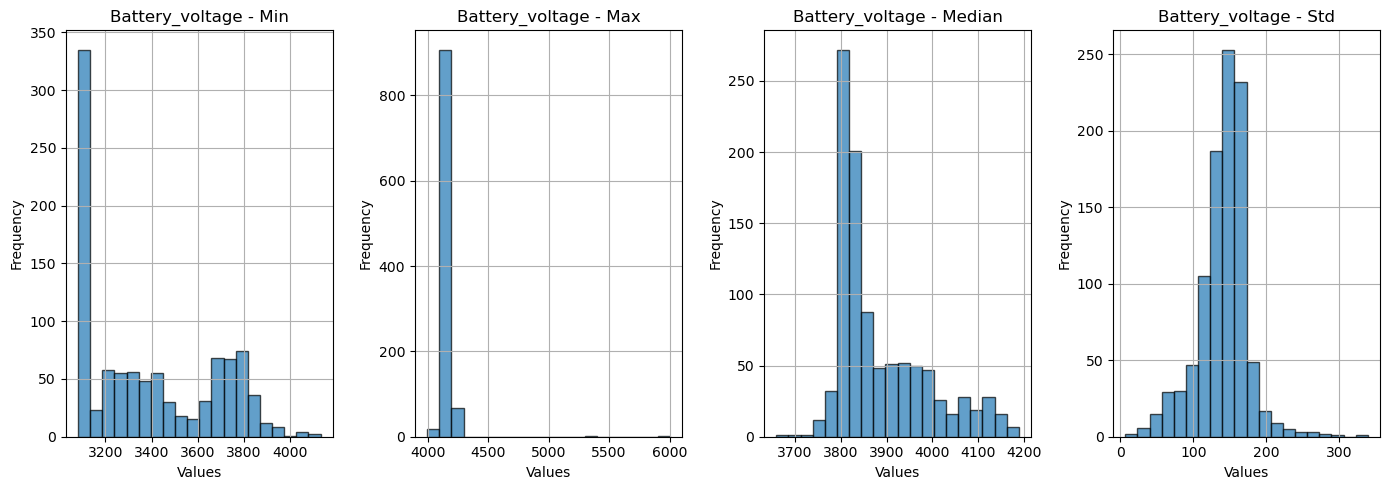

In [92]:
plot_parameter_statistics(stats_df, 'battery_voltage')

In [94]:
stats_df['n_records'] = stats_df['enmo_count']
stats_df = stats_df.loc[:, ~stats_df.columns.str.endswith('_count')]
stats_df.to_csv('stats.csv', index=False)

In [96]:
worn_data = series_train[series_train['non-wear_flag'] == 0]

# recalculating the time difference between rows and measurement_after_gap flag
worn_data['time_diff'] = (worn_data['day_time'].diff() * 86400).round(0)
worn_data['measurement_after_gap'] = worn_data['time_diff'] > expected_diff
worn_data['measurement_after_gap'].value_counts()

measurement_after_gap
False    281762
True       5417
Name: count, dtype: int64

No motion periods

In [99]:
worn_data[worn_data['enmo'] == 0]

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT,time_of_day_hours,day_time,day_period,time_diff,measurement_after_gap
4078,4078,0.018765,-0.001417,-0.994812,0.0,-88.945023,0.0,1.301471,4187.00,67775000000000,2,2,5.0,18.826389,5.784433,day,5.0,False
4992,4992,0.633071,0.704558,0.253792,0.0,15.040052,0.0,1.558824,4181.00,72435000000000,2,2,5.0,20.120833,5.838368,day,5.0,False
4993,4993,0.634418,0.703494,0.251357,0.0,14.854968,0.0,1.617647,4181.00,72440000000000,2,2,5.0,20.122222,5.838426,day,5.0,False
5054,5054,-0.618689,-0.722981,-0.240014,0.0,-14.187988,0.0,3.000000,4181.00,72775000000000,2,2,5.0,20.215278,5.842303,day,5.0,False
5055,5055,-0.627112,-0.710498,-0.253115,0.0,-14.900688,0.0,2.500000,4181.00,72780000000000,2,2,5.0,20.216667,5.842361,day,5.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287166,287166,0.015331,0.008833,-0.982898,0.0,-89.077194,0.0,7.000000,3695.25,32655000000000,6,3,51.0,9.070833,51.377951,day,5.0,False
287168,287168,0.004909,0.007708,-0.982881,0.0,-89.462204,0.0,7.000000,3700.00,36125000000000,6,3,51.0,10.034722,51.418113,day,5.0,False
287169,287169,0.005639,0.007656,-0.983245,0.0,-89.462273,0.0,7.000000,3700.00,36130000000000,6,3,51.0,10.036111,51.418171,day,5.0,False
287171,287171,0.010046,-0.003048,-0.984232,0.0,-89.322456,0.0,7.000000,3700.00,49220000000000,6,3,51.0,13.672222,51.569676,day,5.0,False


In [101]:
no_motion = worn_data['enmo'] == 0

motion_group = (
    (no_motion != no_motion.shift()) |
    (worn_data['measurement_after_gap'])
).cumsum()

no_motion_periods = worn_data[no_motion].groupby(
    motion_group
)['day_time'].agg(['min', 'max'])

no_motion_periods['duration_sec'] = (
    (no_motion_periods['max'] - no_motion_periods['min']) * 86400
).round(0).astype(int)

print(f"Min duration in seconds: {no_motion_periods['duration_sec'].min()}")
print(f"Max duration in seconds: {no_motion_periods['duration_sec'].max()}")

Min duration in seconds: 0
Max duration in seconds: 110


In [103]:
no_motion_periods['duration_sec'] += 5

print("Total duration in hours:", no_motion_periods['duration_sec'].sum() / 3600)
no_motion_periods.sort_values(by='duration_sec')

Total duration in hours: 7.618055555555555


,min,max,duration_sec
11,5.784433,5.784433,5
5387,22.804225,22.804225,5
5384,22.788368,22.788368,5
5382,22.743461,22.743461,5
5380,22.649306,22.649306,5
...,...,...,...
1108,9.803993,9.804456,45
5715,23.463773,23.464294,50
4302,19.400405,19.401215,75
5719,23.465220,23.466030,75
